In [1]:
#import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow  as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *

from tensorflow.keras.callbacks import *


from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

import os

In [62]:
#see if gpu is avaible
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
#get data and filtere it 
frame = pd.read_csv(r'weekcount.csv')
df = pd.DataFrame(frame)
df.drop(df[df['year'] == 2020].index, inplace = True) #'REMOVE2020'
#df.drop(df[df['year'] == 2015].index, inplace = True) #remove 2015
#df.drop(df[df['year'] == 2019].index, inplace = True) #'REMOVE2020'
test = pd.DataFrame(df)

#reading and dumming datta
col = list(df.columns.values)

 
df.head()

year  week                station  anzahl
0  2015    39      5 Corners Library      43
1  2015    39  Baldwin at Montgomery      66
2  2015    39           Bayside Park      16
3  2015    39           Brunswick St     186
4  2015    39            Central Ave      25

In [3]:
#get input and output
x = df.drop("anzahl",axis=1)
y = df["anzahl"]


In [4]:
#split data into train and test
x_train, x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2,shuffle=False)


In [5]:
#normalisie data
ct = make_column_transformer(
 (MinMaxScaler(),["year","week"]),
     (OneHotEncoder(handle_unknown="ignore"),["station"])
 )

ct.fit(x_train)

x_train_normalized = ct.transform(x_train)

x_test_normalized = ct.transform(x_test)

x_train_normalized.shape

(8375, 65)

In [67]:
print(x_test_normalized.toarray())

[[1.         0.19230769 0.         ... 0.         0.         0.        ]
 [1.         0.19230769 0.         ... 0.         0.         0.        ]
 [1.         0.19230769 0.         ... 0.         0.         0.        ]
 ...
 [1.         0.98076923 0.         ... 0.         0.         0.        ]
 [1.         0.98076923 0.         ... 1.         0.         0.        ]
 [1.         0.98076923 0.         ... 0.         0.         1.        ]]


In [68]:
#load saved model if avaiable 
with tf.device('/device:GPU:0'):
    model = keras.models.load_model('Model1')

In [10]:
#create Model structure
with tf.device('/device:CPU:0'):
    model = Sequential()


    model.add(Dense(65, kernel_initializer='normal',  activation='relu', input_shape=(65,) ))
    #model.add(Dropout(0.3))
    model.add(Dense(35, kernel_initializer='normal',activation='relu'))
    #model.add(Dropout(0.3))
    model.add(Dense(12, kernel_initializer='normal',activation='relu'))
    #model.add(Dropout(0.3))
    model.add(Dense(1, kernel_initializer='normal',activation=None))


In [11]:
#set model loss and optimizer
with tf.device('/device:CPU:0'):
    model.compile(optimizer= Adam(learning_rate=0.001),loss='mae', metrics=['mae','mape'])

In [59]:
#checkpoint to save best Model which isnt overfitted
checkpoint = ModelCheckpoint('Model1', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='min' )

In [12]:
#train Model
with tf.device('/device:CPU:0'):
    history = model.fit(x_train_normalized, y_train.values, epochs=1000 , batch_size=100,shuffle=False ,verbose = 1   ) #,callbacks=[checkpoint]

Epoch 1/1000
84/84 [==============================] - 0s 2ms/step - loss: 111.4950 - mae: 111.4950 - mape: 98.5703
Epoch 2/1000
84/84 [==============================] - 0s 2ms/step - loss: 90.9770 - mae: 90.9770 - mape: 162.7460
Epoch 3/1000
84/84 [==============================] - 0s 2ms/step - loss: 69.7483 - mae: 69.7483 - mape: 249.2593
Epoch 4/1000
84/84 [==============================] - 0s 2ms/step - loss: 58.1477 - mae: 58.1477 - mape: 142.2871
Epoch 5/1000
84/84 [==============================] - 0s 2ms/step - loss: 51.5578 - mae: 51.5578 - mape: 85.3222
Epoch 6/1000
84/84 [==============================] - 0s 2ms/step - loss: 48.7469 - mae: 48.7469 - mape: 75.4823
Epoch 7/1000
84/84 [==============================] - 0s 2ms/step - loss: 48.3504 - mae: 48.3504 - mape: 72.4597
Epoch 8/1000
84/84 [==============================] - 0s 2ms/step - loss: 47.2623 - mae: 47.2623 - mape: 72.6587
Epoch 9/1000
84/84 [==============================] - 0s 2ms/step - loss: 46.2889 - mae: 46

84/84 [==============================] - 0s 2ms/step - loss: 46.4781 - mae: 46.4781 - mape: 70.6890
Epoch 144/1000
84/84 [==============================] - 0s 2ms/step - loss: 45.5357 - mae: 45.5357 - mape: 71.7705
Epoch 145/1000
84/84 [==============================] - 0s 2ms/step - loss: 46.6104 - mae: 46.6104 - mape: 72.3882
Epoch 146/1000
84/84 [==============================] - 0s 2ms/step - loss: 45.9598 - mae: 45.9598 - mape: 71.8796
Epoch 147/1000
84/84 [==============================] - 0s 2ms/step - loss: 46.3856 - mae: 46.3856 - mape: 72.7558
Epoch 148/1000
84/84 [==============================] - 0s 2ms/step - loss: 47.1188 - mae: 47.1188 - mape: 73.3215
Epoch 149/1000
84/84 [==============================] - 0s 2ms/step - loss: 46.1227 - mae: 46.1227 - mape: 70.9842
Epoch 150/1000
84/84 [==============================] - 0s 2ms/step - loss: 45.3353 - mae: 45.3353 - mape: 71.8697
Epoch 151/1000
84/84 [==============================] - 0s 2ms/step - loss: 46.3157 - mae: 46.3

84/84 [==============================] - 0s 1ms/step - loss: 41.1422 - mae: 41.1422 - mape: 66.0806
Epoch 286/1000
84/84 [==============================] - 0s 1ms/step - loss: 42.9662 - mae: 42.9662 - mape: 66.2219
Epoch 287/1000
84/84 [==============================] - 0s 1ms/step - loss: 41.9453 - mae: 41.9453 - mape: 66.9356
Epoch 288/1000
84/84 [==============================] - 0s 1ms/step - loss: 42.2903 - mae: 42.2903 - mape: 66.3369
Epoch 289/1000
84/84 [==============================] - 0s 1ms/step - loss: 41.8681 - mae: 41.8681 - mape: 66.7543
Epoch 290/1000
84/84 [==============================] - 0s 2ms/step - loss: 41.5371 - mae: 41.5371 - mape: 66.6762
Epoch 291/1000
84/84 [==============================] - 0s 1ms/step - loss: 40.6692 - mae: 40.6692 - mape: 64.9581
Epoch 292/1000
84/84 [==============================] - 0s 1ms/step - loss: 40.6579 - mae: 40.6579 - mape: 65.7118
Epoch 293/1000
84/84 [==============================] - 0s 3ms/step - loss: 41.9522 - mae: 41.9

84/84 [==============================] - 0s 1ms/step - loss: 37.9676 - mae: 37.9676 - mape: 64.2104
Epoch 428/1000
84/84 [==============================] - 0s 2ms/step - loss: 37.7555 - mae: 37.7555 - mape: 64.6997
Epoch 429/1000
84/84 [==============================] - 0s 1ms/step - loss: 37.6685 - mae: 37.6685 - mape: 65.4573
Epoch 430/1000
84/84 [==============================] - 0s 1ms/step - loss: 36.5889 - mae: 36.5889 - mape: 61.3082
Epoch 431/1000
84/84 [==============================] - 0s 1ms/step - loss: 36.8391 - mae: 36.8391 - mape: 62.1134
Epoch 432/1000
84/84 [==============================] - 0s 1ms/step - loss: 37.4075 - mae: 37.4075 - mape: 63.5085
Epoch 433/1000
84/84 [==============================] - 0s 1ms/step - loss: 36.7386 - mae: 36.7386 - mape: 63.2296
Epoch 434/1000
84/84 [==============================] - 0s 1ms/step - loss: 36.1002 - mae: 36.1002 - mape: 62.0303
Epoch 435/1000
84/84 [==============================] - 0s 1ms/step - loss: 36.7105 - mae: 36.7

84/84 [==============================] - 0s 1ms/step - loss: 35.3998 - mae: 35.3998 - mape: 66.3717
Epoch 570/1000
84/84 [==============================] - 0s 1ms/step - loss: 35.7888 - mae: 35.7888 - mape: 68.7396
Epoch 571/1000
84/84 [==============================] - 0s 2ms/step - loss: 35.6203 - mae: 35.6203 - mape: 66.8242
Epoch 572/1000
84/84 [==============================] - 0s 1ms/step - loss: 35.1546 - mae: 35.1546 - mape: 66.7258
Epoch 573/1000
84/84 [==============================] - 0s 1ms/step - loss: 34.6884 - mae: 34.6884 - mape: 66.2392
Epoch 574/1000
84/84 [==============================] - 0s 1ms/step - loss: 35.3816 - mae: 35.3816 - mape: 66.2259
Epoch 575/1000
84/84 [==============================] - 0s 1ms/step - loss: 34.8857 - mae: 34.8857 - mape: 67.8341
Epoch 576/1000
84/84 [==============================] - 0s 1ms/step - loss: 35.1228 - mae: 35.1228 - mape: 67.1361
Epoch 577/1000
84/84 [==============================] - 0s 1ms/step - loss: 35.1426 - mae: 35.1

84/84 [==============================] - 0s 2ms/step - loss: 33.1628 - mae: 33.1628 - mape: 71.2319
Epoch 712/1000
84/84 [==============================] - 0s 1ms/step - loss: 32.7129 - mae: 32.7129 - mape: 70.0408
Epoch 713/1000
84/84 [==============================] - 0s 1ms/step - loss: 32.9514 - mae: 32.9514 - mape: 69.2655
Epoch 714/1000
84/84 [==============================] - 0s 1ms/step - loss: 33.6804 - mae: 33.6804 - mape: 71.3899
Epoch 715/1000
84/84 [==============================] - 0s 1ms/step - loss: 33.8831 - mae: 33.8831 - mape: 72.1233
Epoch 716/1000
84/84 [==============================] - 0s 2ms/step - loss: 33.3983 - mae: 33.3983 - mape: 69.6053
Epoch 717/1000
84/84 [==============================] - 0s 1ms/step - loss: 33.5717 - mae: 33.5717 - mape: 71.6032
Epoch 718/1000
84/84 [==============================] - 0s 1ms/step - loss: 33.3530 - mae: 33.3530 - mape: 71.4790
Epoch 719/1000
84/84 [==============================] - 0s 1ms/step - loss: 33.7075 - mae: 33.7

84/84 [==============================] - 0s 2ms/step - loss: 32.3938 - mae: 32.3938 - mape: 73.7274
Epoch 854/1000
84/84 [==============================] - 0s 1ms/step - loss: 33.5665 - mae: 33.5665 - mape: 73.1909
Epoch 855/1000
84/84 [==============================] - 0s 2ms/step - loss: 33.8630 - mae: 33.8630 - mape: 73.6822
Epoch 856/1000
84/84 [==============================] - 0s 1ms/step - loss: 33.9837 - mae: 33.9837 - mape: 74.6600
Epoch 857/1000
84/84 [==============================] - 0s 1ms/step - loss: 33.1136 - mae: 33.1136 - mape: 74.4272
Epoch 858/1000
84/84 [==============================] - 0s 2ms/step - loss: 33.7754 - mae: 33.7754 - mape: 73.6012
Epoch 859/1000
84/84 [==============================] - 0s 1ms/step - loss: 33.6059 - mae: 33.6059 - mape: 74.3156
Epoch 860/1000
84/84 [==============================] - 0s 1ms/step - loss: 34.0994 - mae: 34.0994 - mape: 73.3041
Epoch 861/1000
84/84 [==============================] - 0s 1ms/step - loss: 32.4731 - mae: 32.4

84/84 [==============================] - 0s 1ms/step - loss: 32.8705 - mae: 32.8705 - mape: 73.7942
Epoch 996/1000
84/84 [==============================] - 0s 1ms/step - loss: 33.7890 - mae: 33.7890 - mape: 75.1329
Epoch 997/1000
84/84 [==============================] - 0s 3ms/step - loss: 33.1240 - mae: 33.1240 - mape: 75.3906
Epoch 998/1000
84/84 [==============================] - 0s 2ms/step - loss: 32.9218 - mae: 32.9218 - mape: 75.3734
Epoch 999/1000
84/84 [==============================] - 0s 2ms/step - loss: 32.1776 - mae: 32.1776 - mape: 72.8813
Epoch 1000/1000
84/84 [==============================] - 0s 2ms/step - loss: 33.0108 - mae: 33.0108 - mape: 74.5665


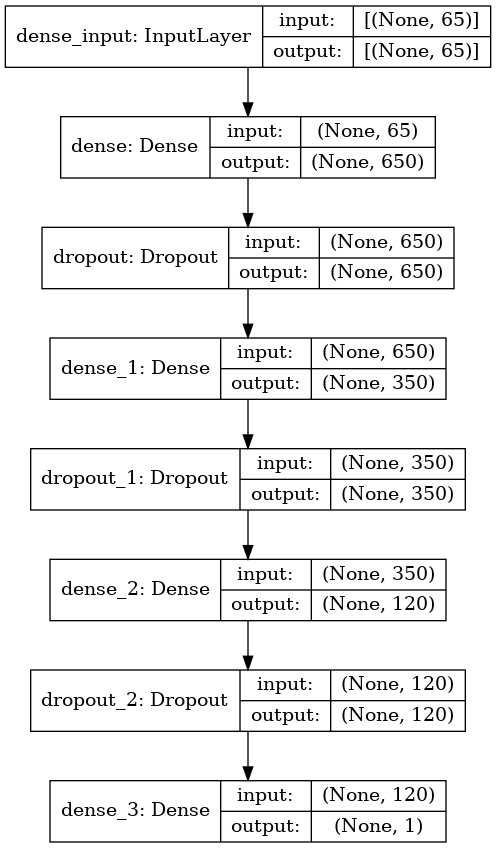

In [12]:
tf.keras.utils.plot_model(model,    show_shapes=True)

In [13]:
model.evaluate(x_test_normalized,y_test.values)

66/66 [==============================] - 1s 12ms/step - loss: 34.0888 - mae: 34.0888 - mape: 32.0994


[34.08882522583008, 34.08882522583008, 32.099365234375]

In [41]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 50])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Anzahl]')
    plt.legend()
    plt.grid(True)

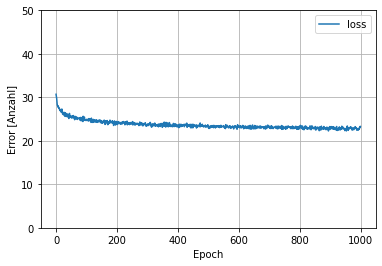

In [55]:
with tf.device('/device:CPU:0'):
    plot_loss(history)

In [43]:
stationnamesframe =   test.drop_duplicates() 
stationnamesframe = pd.DataFrame(stationnamesframe,columns=['station'])
stationnamesframe =   stationnamesframe.drop_duplicates() 
stationnames =  pd.DataFrame(stationnamesframe , columns=['station'])['station'].to_numpy().tolist()
print(stationnames)

['5 Corners Library', 'Baldwin at Montgomery', 'Bayside Park', 'Brunswick St', 'Central Ave', 'Christ Hospital', 'City Hall', 'Columbia Park', 'Dey St', 'Essex Light Rail', 'Exchange Place', 'Garfield Ave Station', 'Grove St PATH', 'Hamilton Park', 'Heights Elevator', 'Hilltop', 'JC Medical Center', 'Liberty Light Rail', 'Lincoln Park', 'MLK Light Rail', 'McGinley Square', 'NJCU', 'Newark Ave', 'Newport PATH', 'Newport Pkwy', 'North St', 'Oakland Ave', 'Paulus Hook', 'Pershing Field', 'Riverview Park', 'Sip Ave', 'Union St', 'Van Vorst Park', 'Warren St', 'West Side Light Rail', 'Jersey & 3rd', 'Jersey & 6th St', 'Lafayette Park', 'Morris Canal', 'Bethune Center', 'Columbus Drive', 'Danforth Light Rail', 'Dixon Mills', 'Leonard Gordon Park', 'Manila & 1st', 'Marin Light Rail', 'Monmouth and 6th', 'Astor Place', 'Brunswick & 6th', 'JCBS Depot', 'Communipaw & Berry Lane', 'York St', 'Harborside', 'Journal Square', 'Washington St', 'Bergen Ave', 'Fairmount Ave', 'Glenwood Ave', 'Grand St'

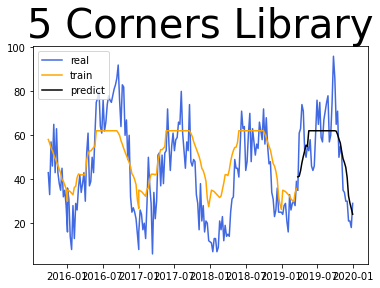

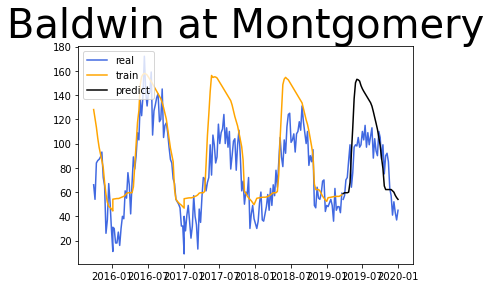

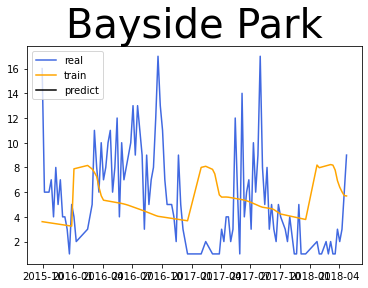

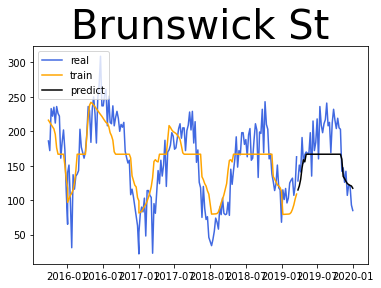

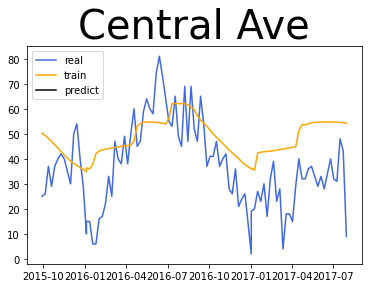

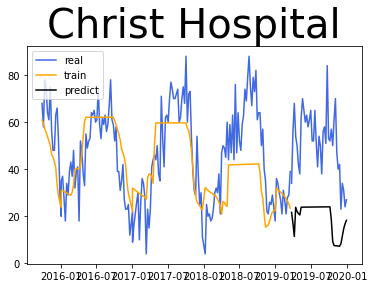

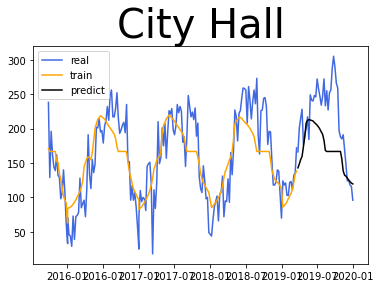

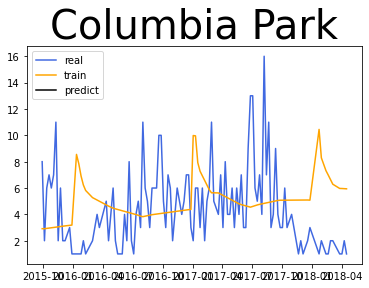

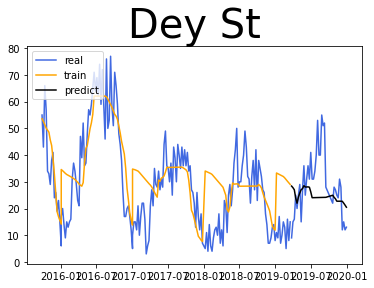

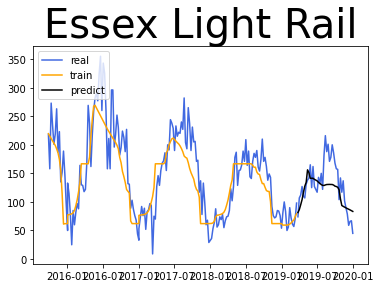

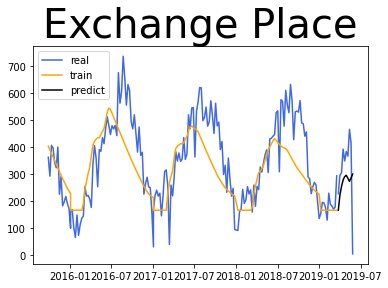

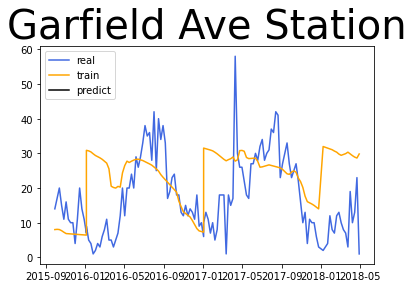

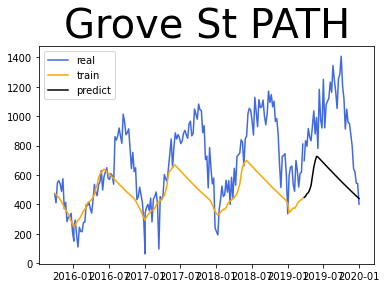

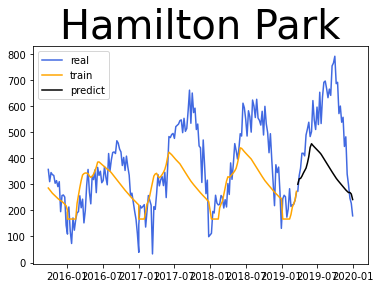

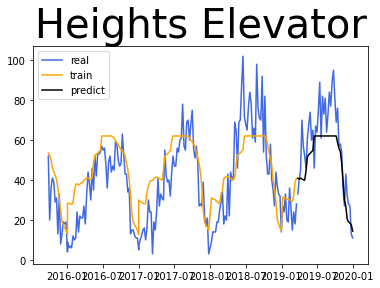

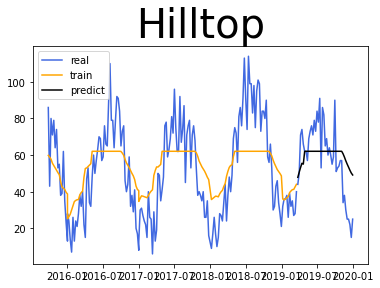

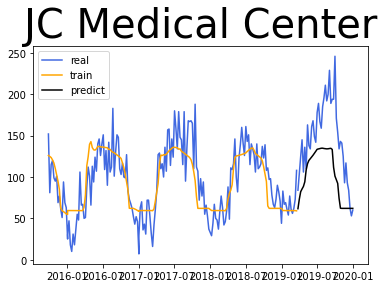

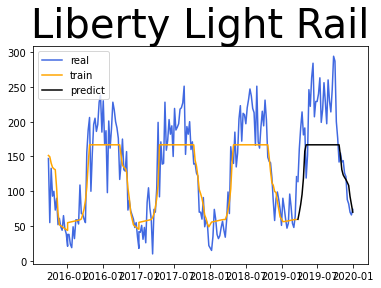

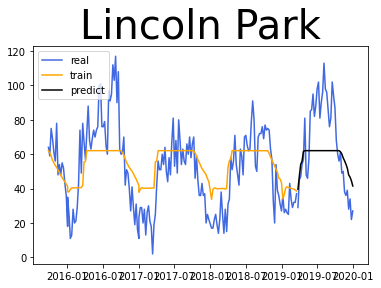

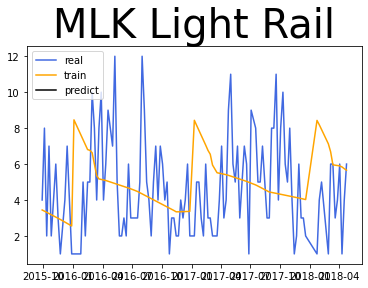

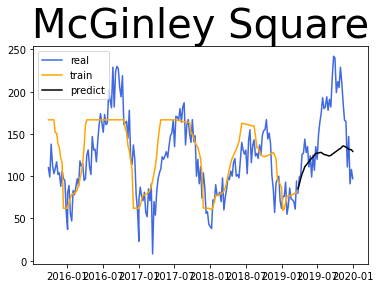

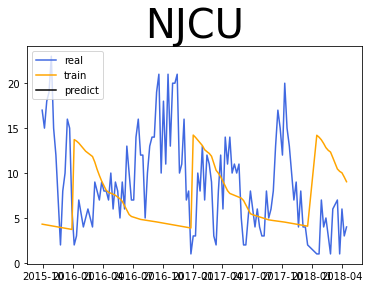

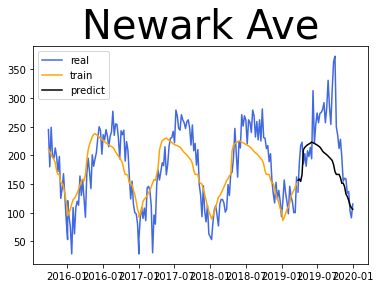

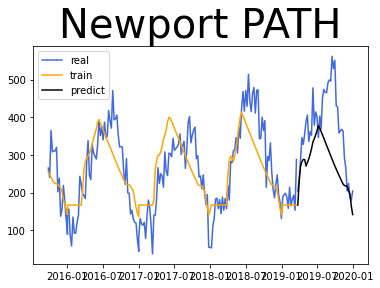

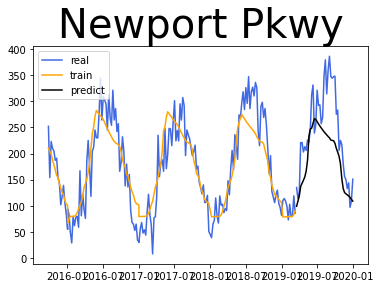

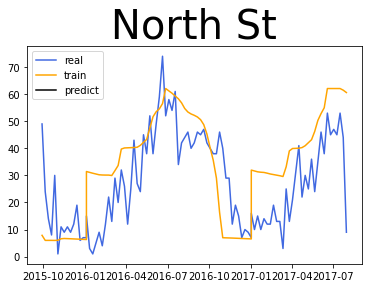

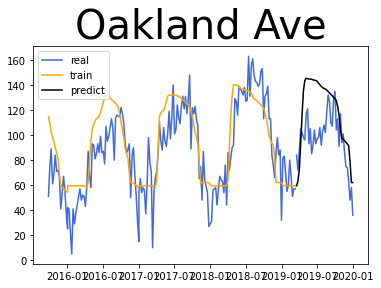

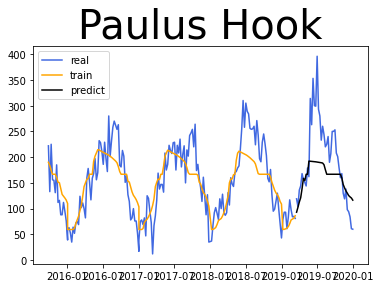

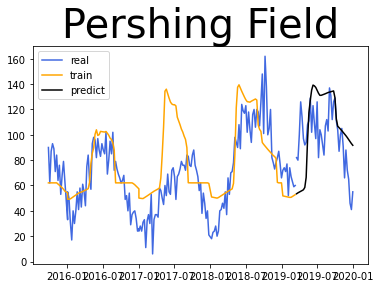

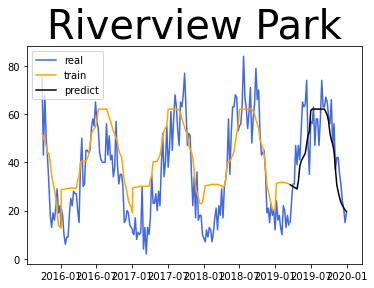

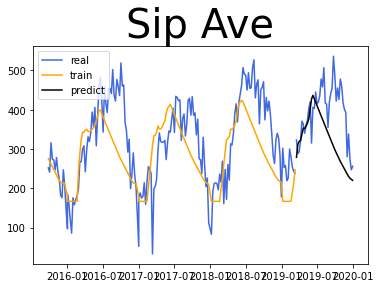

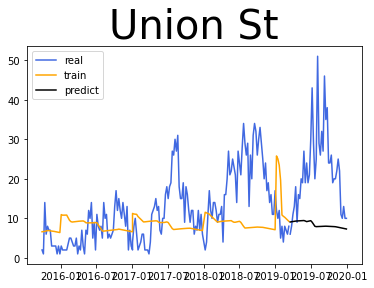

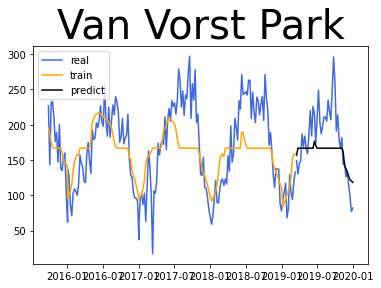

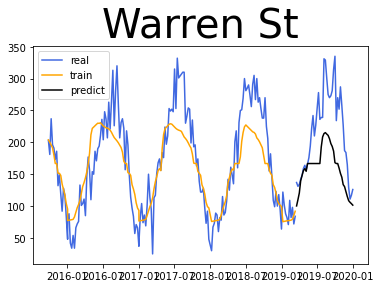

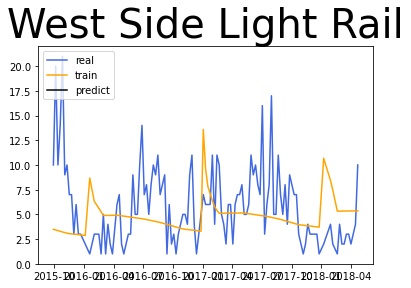

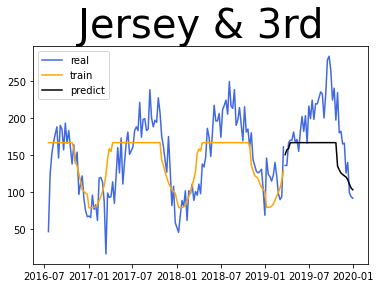

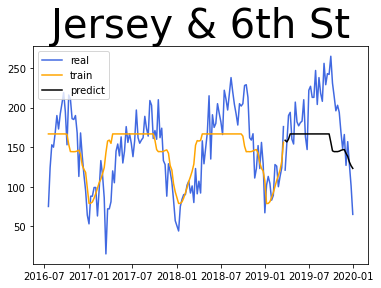

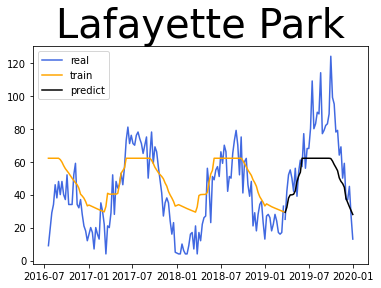

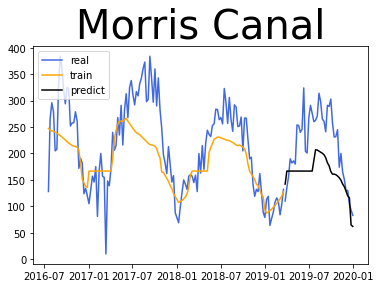

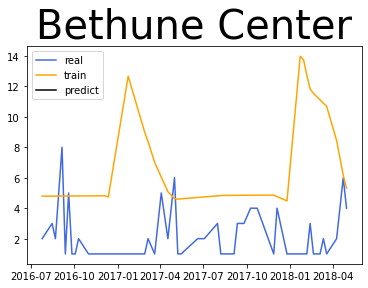

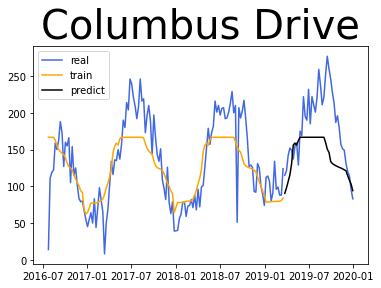

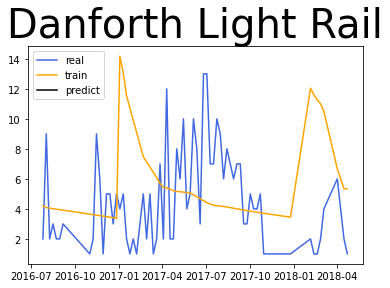

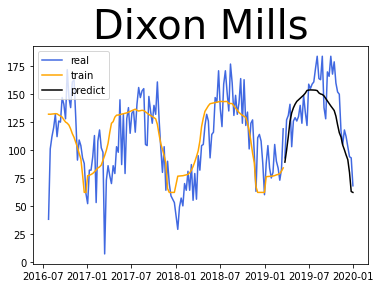

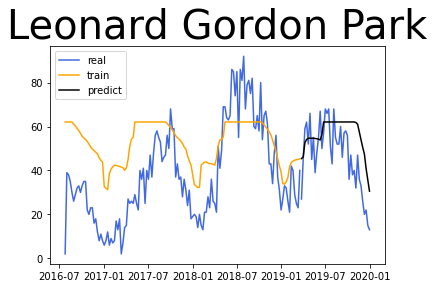

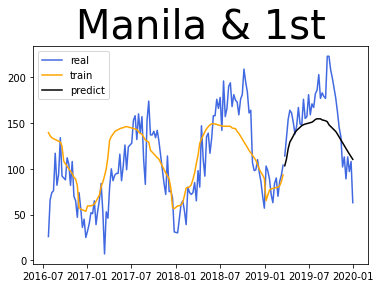

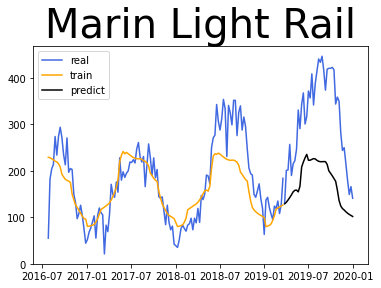

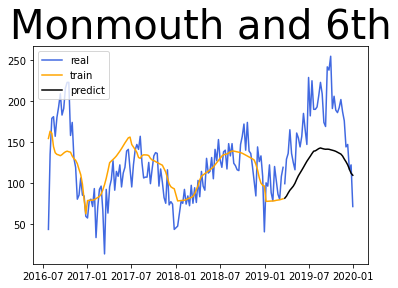

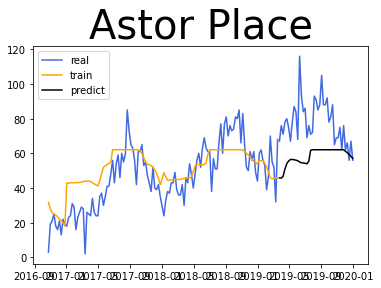

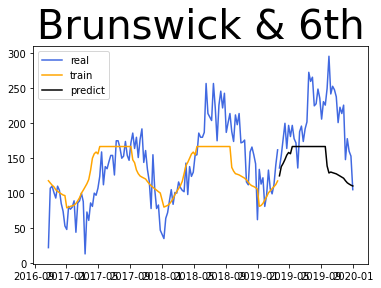

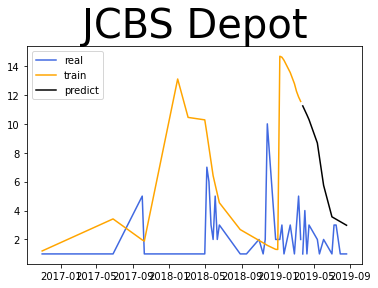

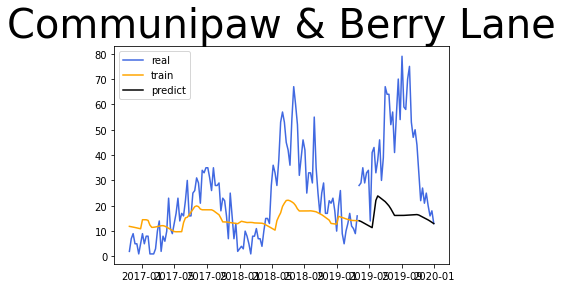

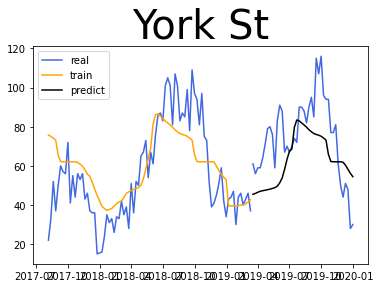

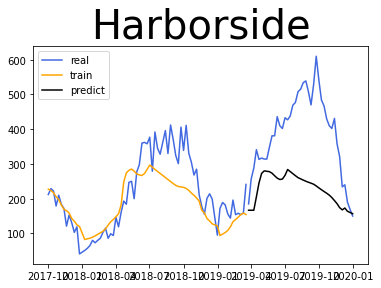

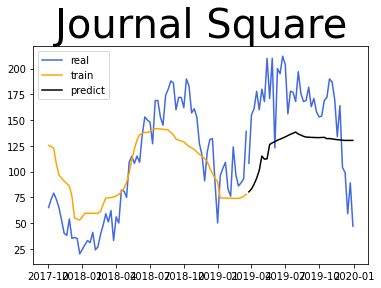

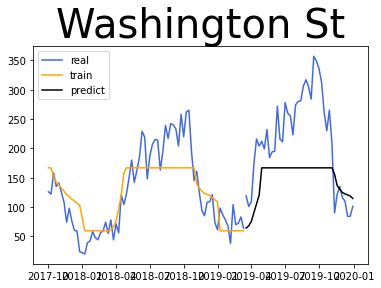

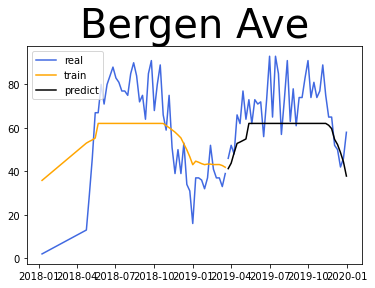

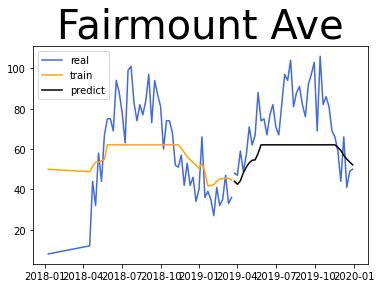

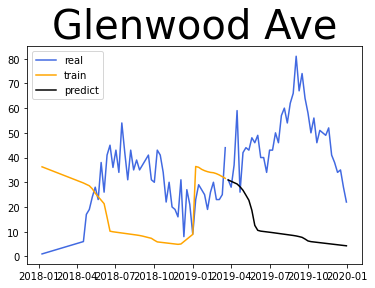

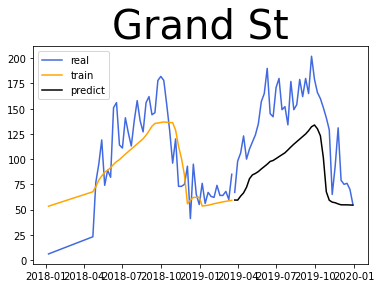

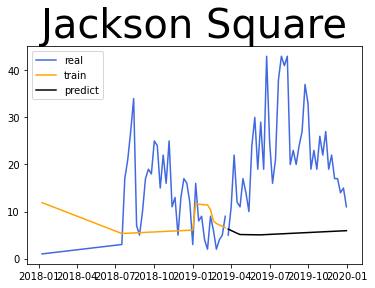

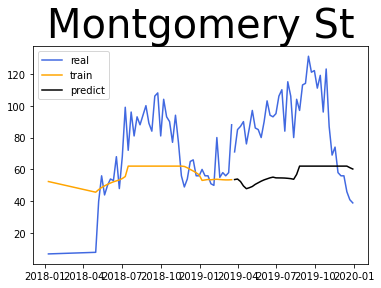

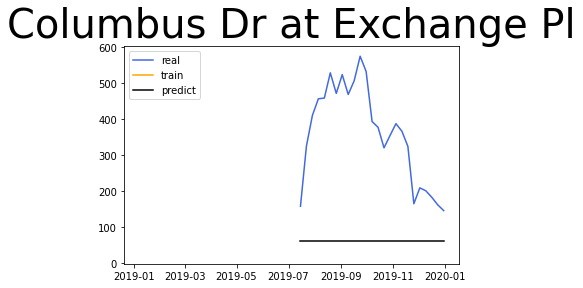

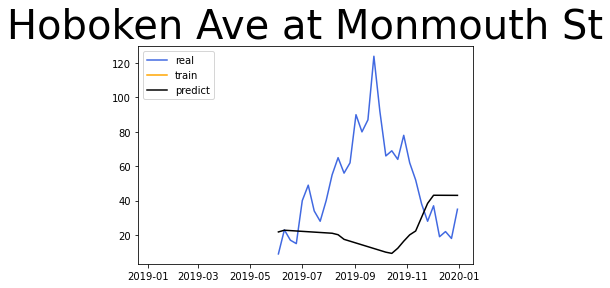

In [52]:
#show result data linear

for station in stationnames:
    predict_train = model.predict(x_train_normalized)
    y1 =  y_train 
    y2 =  predict_train 
    #test = pd.DataFrame({ 'y':y1 ,'y2':y2})#

    test1 = test.iloc[:y_train.shape[0]]
    test1 = pd.DataFrame(test1)
    test1['y'] = y1
    test1['y2'] = y2
    test1 = test1[test1['station']==station]
    test1['yearweek'] = pd.to_datetime(test1['year'].astype(str) + ' ' + test1['week'].astype(str) + ' 1',format='%Y %U %w')
    #print(test1)

    plt.plot(test1['yearweek'],test1['y'],label='real' , color = 'royalblue'  )
    plt.plot(test1['yearweek'],test1['y2'],label='train' , color = 'orange'  )
    predict_test = model.predict(x_test_normalized)
    y1 =  y_test 
    y2 =  predict_test 
    #test = pd.DataFrame({ 'y':y1 ,'y2':y2})#
    test2 = test.iloc[-y_test.shape[0]:]
    test2 = pd.DataFrame(test2)
    test2['y'] = y1
    test2['y2'] = y2
    test2 = test2[test2['station']==station]
    test2['yearweek'] = pd.to_datetime(test2['year'].astype(str) + ' ' + test2['week'].astype(str) + ' 1',format='%Y %U %w')
    #print(test2)
    try:
        mae = mean_absolute_error(test2['y'] ,test2['y2'] )
        plt.title(label=station+", mae: {:0.2f}".format(mae) ,
          fontsize=40,
          color="black")
    except:
        plt.title(label=station+", mae: nan"  ,
          fontsize=40,
          color="black")
    plt.plot(test2['yearweek'],test2['y'],label='_Hidden' , color = 'royalblue'  )
    plt.plot(test2['yearweek'],test2['y2'],label='predict' , color = 'black' )
    
    plt.legend(loc="upper left")
    plt.savefig( 'Model1Images/'+station+'linear.jpg',bbox_inches='tight', dpi=150)
    plt.show()
 

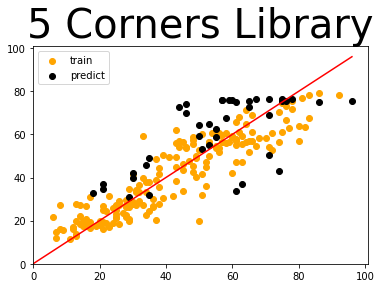

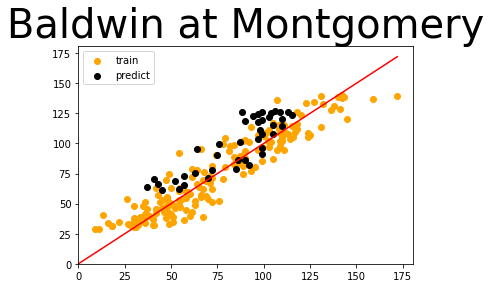

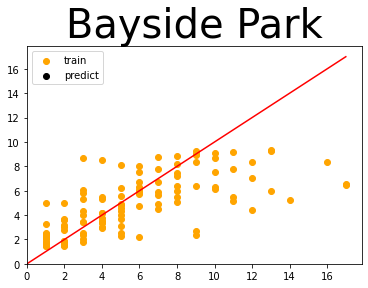

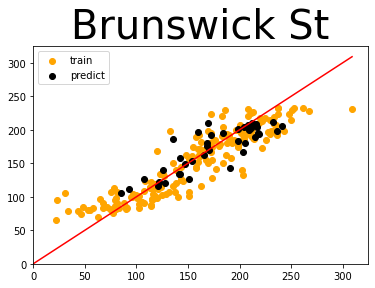

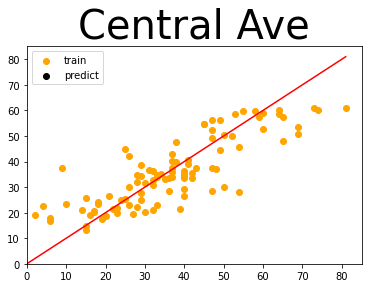

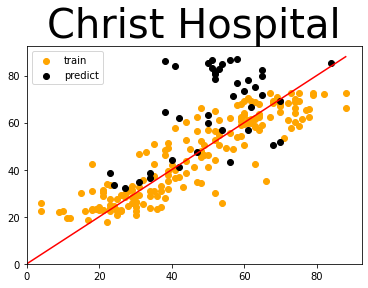

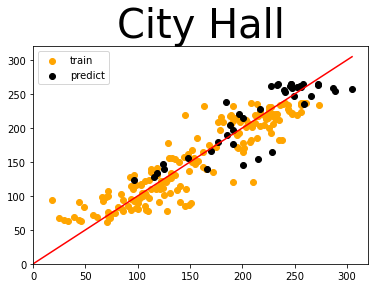

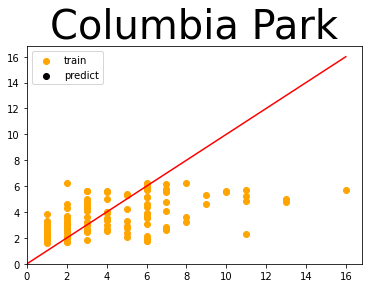

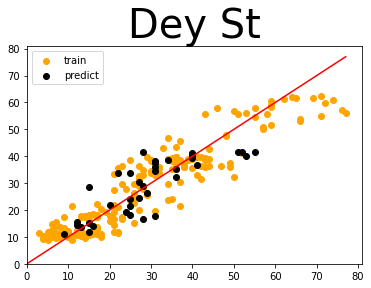

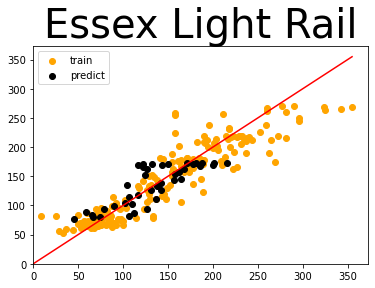

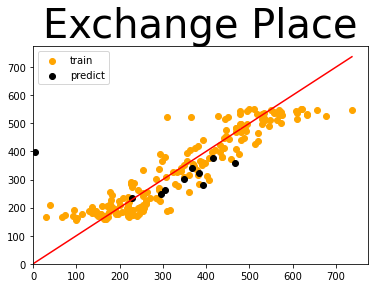

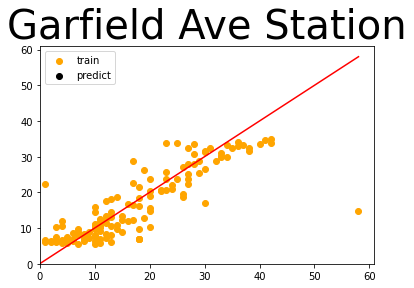

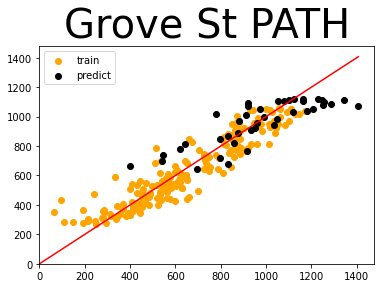

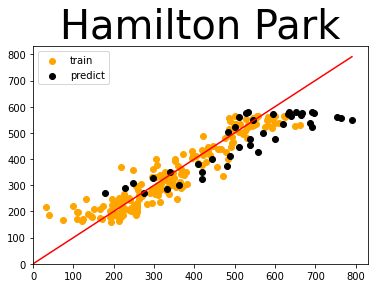

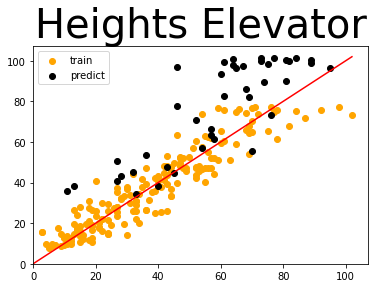

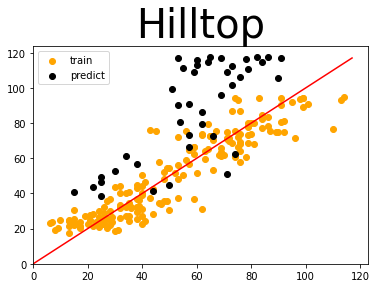

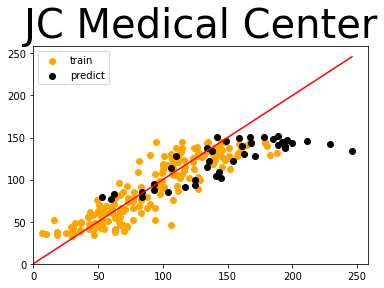

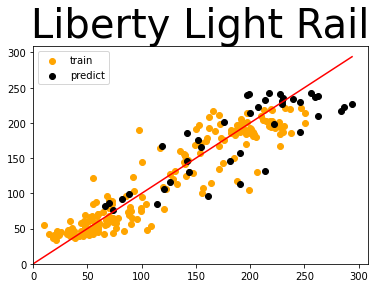

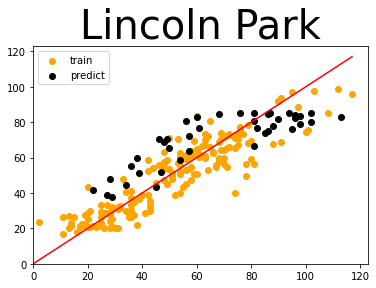

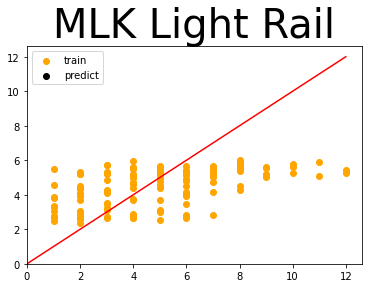

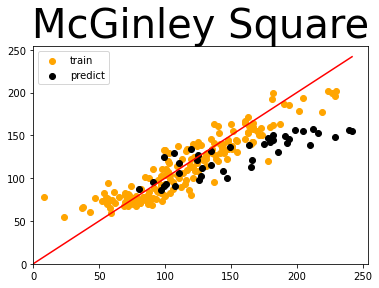

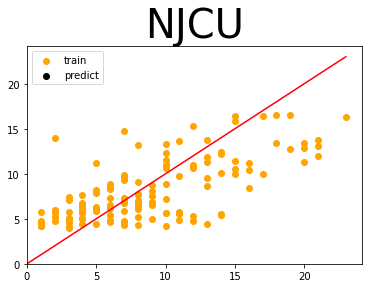

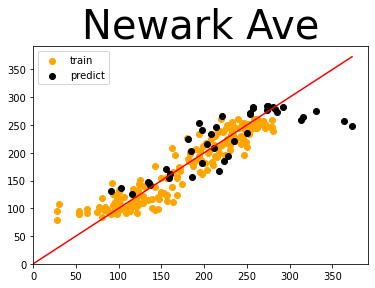

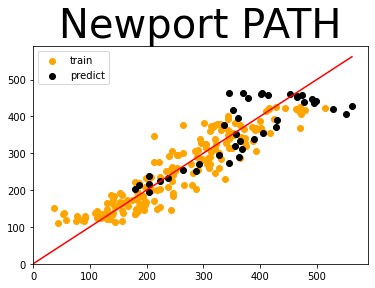

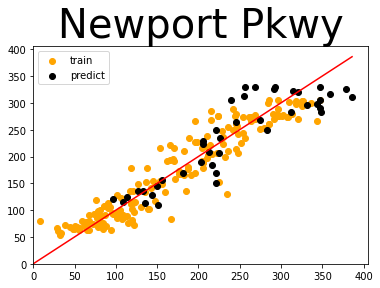

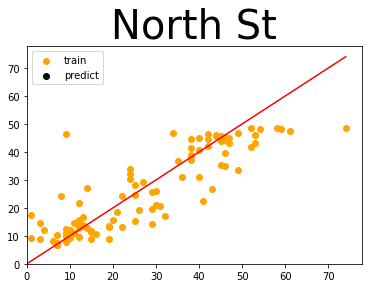

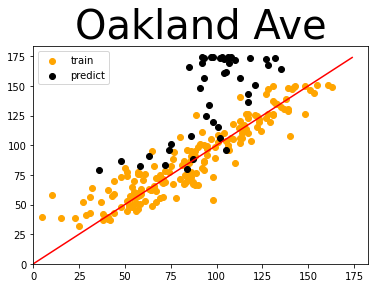

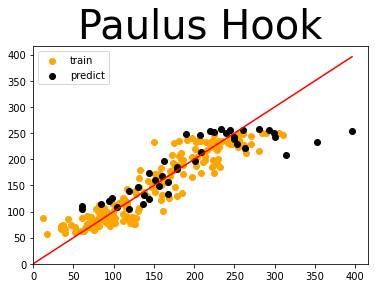

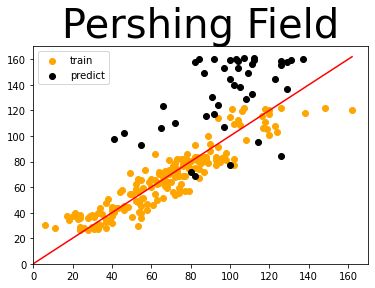

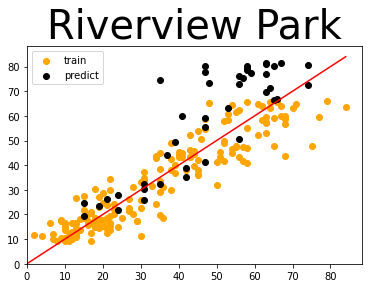

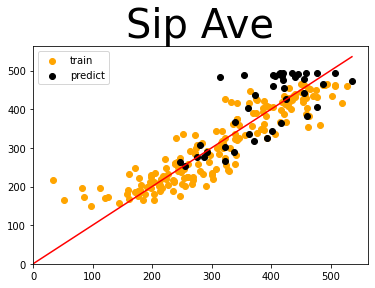

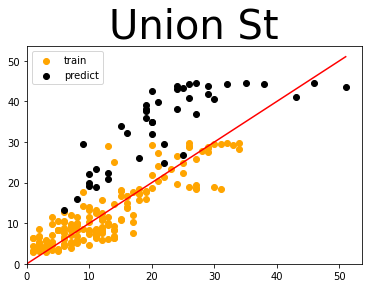

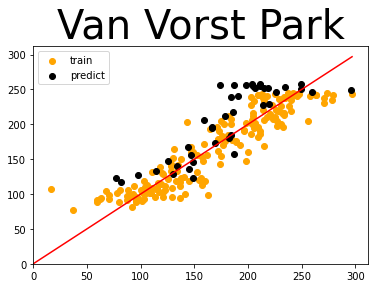

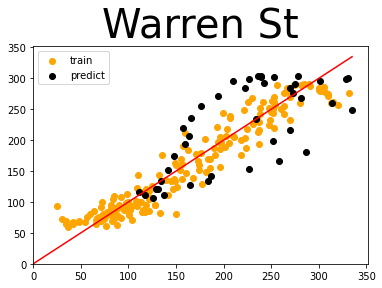

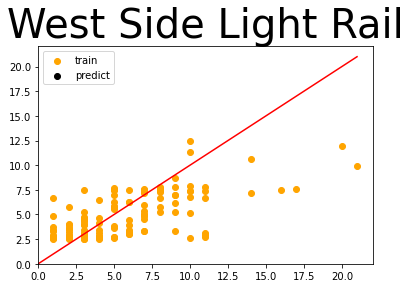

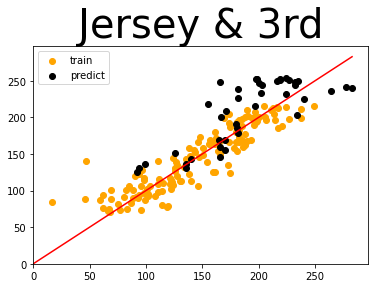

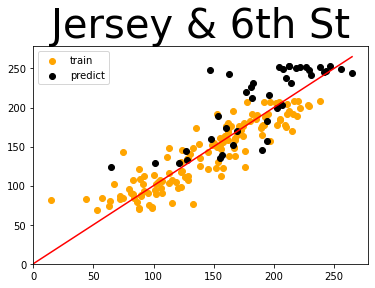

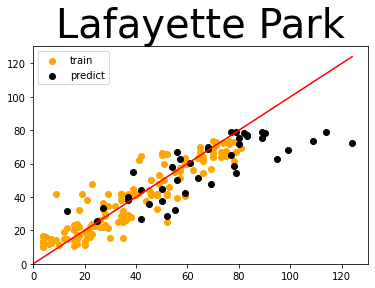

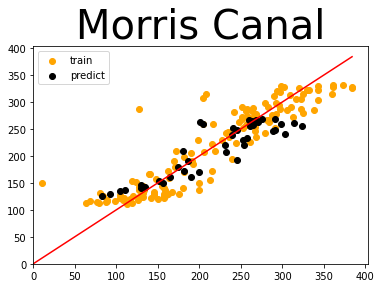

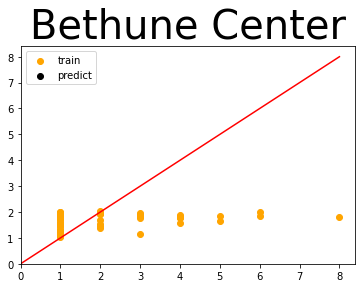

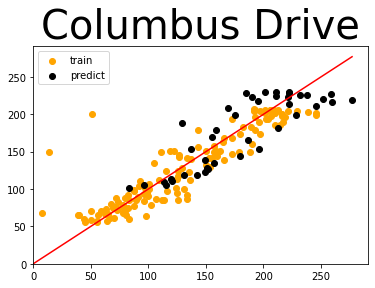

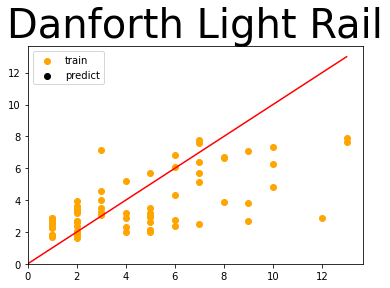

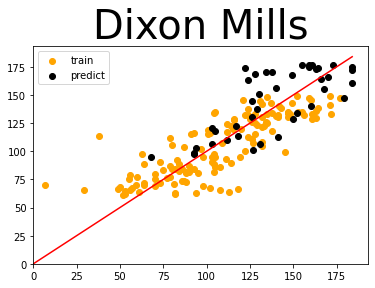

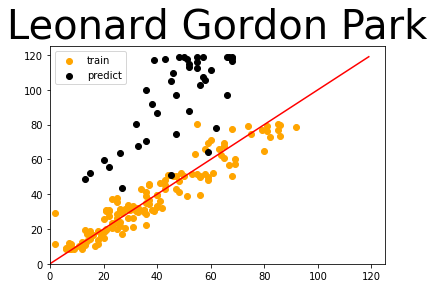

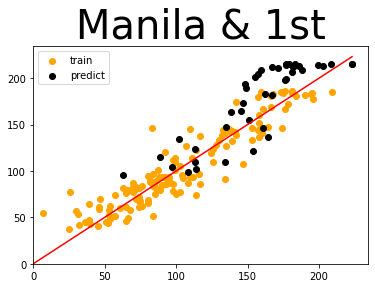

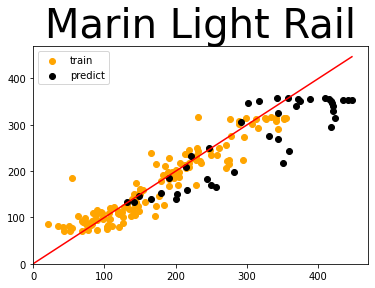

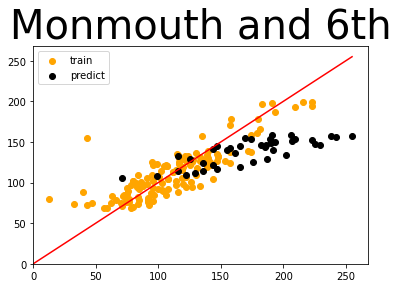

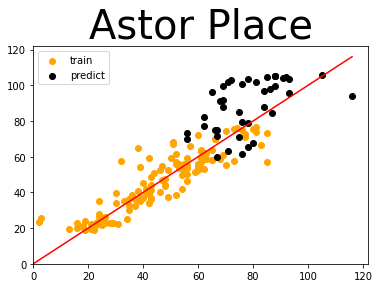

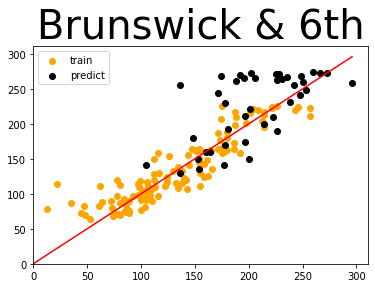

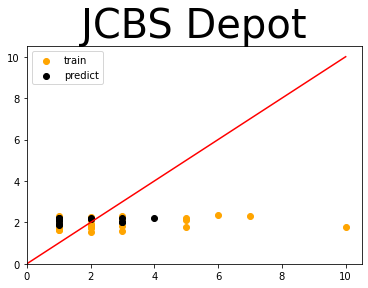

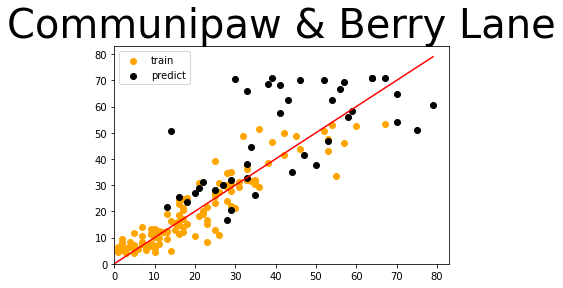

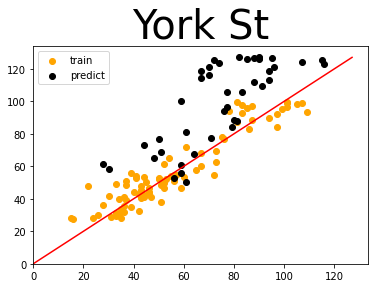

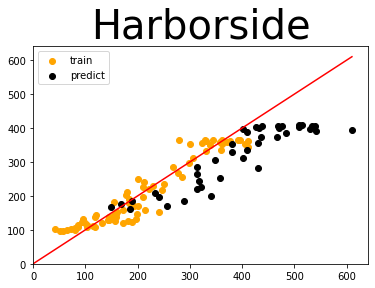

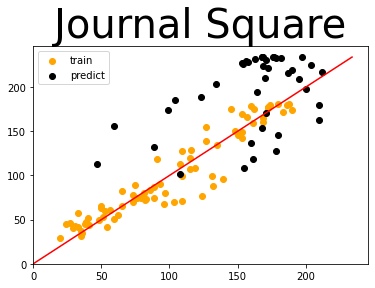

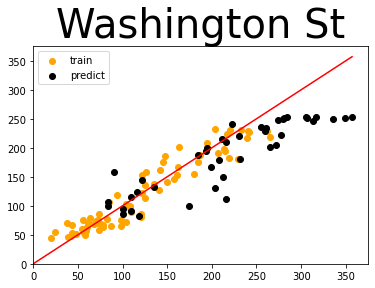

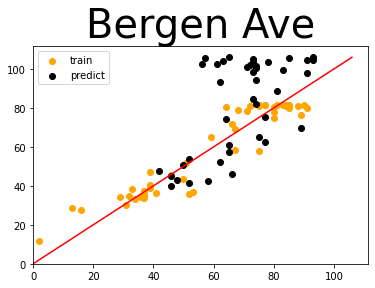

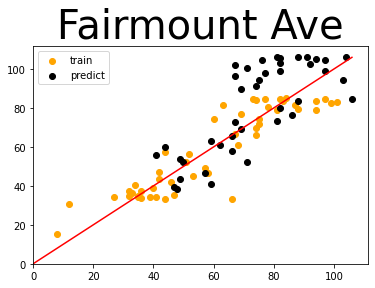

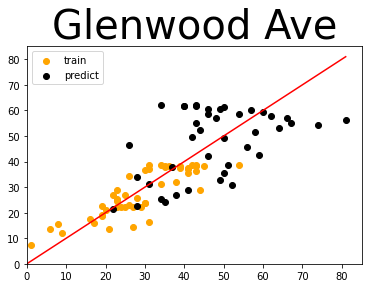

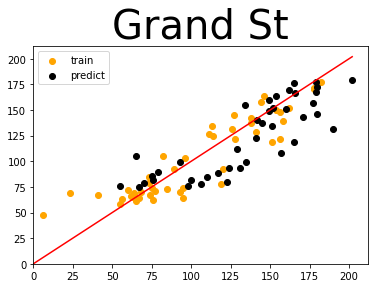

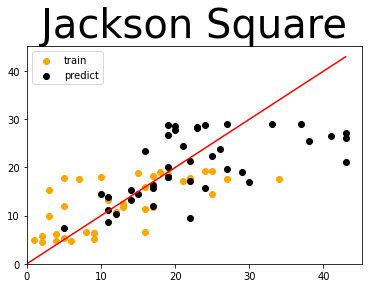

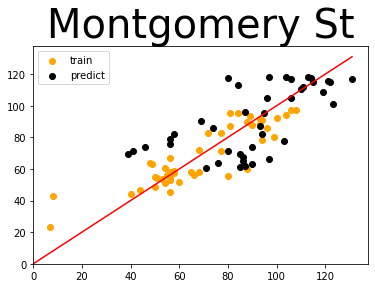

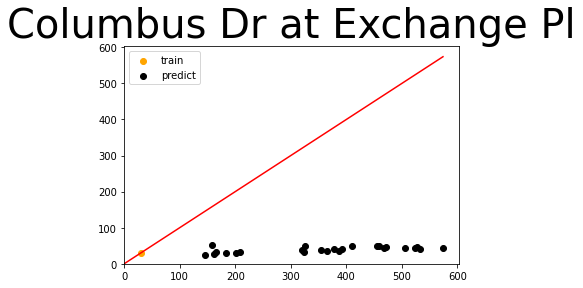

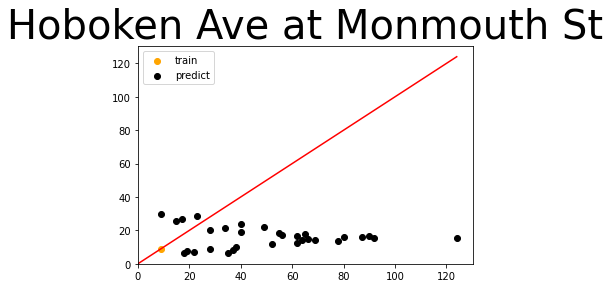

In [45]:
#show result data scatter

for station in stationnames:
    y1 =  y_train 
    y2 = predict_train 
    #test = pd.DataFrame({ 'y':y1 ,'y2':y2})#
    
    test1 = test.iloc[:y_train.shape[0]]
    test1 = pd.DataFrame(test1)
    test1['y'] = y1
    test1['y2'] = y2
    test1 = test1[test1['station']==station]
    test1['yearweek'] = pd.to_datetime(test1['year'].astype(str) + ' ' + test1['week'].astype(str) + ' 1',format='%Y %U %w')
    #print(test1)
     
   
    plt.scatter(test1['y'],test1['y2'],label='train' , color = 'orange'  )
    predict_test = model.predict(x_test_normalized)
    y1 =  y_test 
    y2 =  predict_test 
    #test = pd.DataFrame({ 'y':y1 ,'y2':y2})#
    test2 = test.iloc[-y_test.shape[0]:]
    test2 = pd.DataFrame(test2)
    test2['y'] = y1
    test2['y2'] = y2
    test2 = test2[test2['station']==station]
    test2['yearweek'] = pd.to_datetime(test2['year'].astype(str) + ' ' + test2['week'].astype(str) + ' 1',format='%Y %U %w')
    plt.scatter(test2['y'],test2['y2'],label='predict' , color = 'black' )
    #print(test2)
    maxdata1 = (test1['y'].max())if(test1['y'].max() > test1['y2'].max()) else test1['y2'].max()
    maxdata1 = int(maxdata1)
    maxdata2 = (test2['y'].max())if(test2['y'].max() > test2['y2'].max()) else test2['y2'].max()
    maxdata2 = int( 0 if(np.isnan(maxdata2)) else maxdata2)
    maxdata = (maxdata1)if(maxdata1 > maxdata2) else maxdata2
    maxdata = int(maxdata)
    try:
        mae = mean_absolute_error(test2['y'] ,test2['y2'] )
        plt.title(label=station+", mae: {:0.2f}".format(mae) ,
          fontsize=40,
          color="black")
    except:
        plt.title(label=station+", mae: nan"  ,
          fontsize=40,
          color="black")

    xline =   np.linspace(0,maxdata,maxdata)
    plt.plot([0,maxdata],[0,maxdata] , color='red')
    plt.ylim(bottom=0)
    plt.xlim(xmin=0)
    plt.legend(loc="upper left")
    plt.savefig( 'Model1Images/'+station+'scatter.jpg',bbox_inches='tight', dpi=150)
    plt.show()

In [25]:
with tf.device('/device:GPU:0'):
    results = model.evaluate(x_test_normalized, y_test.values )
print("Result", results)

66/66 [==============================] - 1s 11ms/step - loss: 34.8331 - mae: 34.8331 - mape: 30.1397
Result [34.83308410644531, 34.83308410644531, 30.13968276977539]
